In [5]:
%matplotlib inline  

import torch
from datasets import *
import visualizer
import models
import matplotlib.pyplot as plt


In [6]:
M_model_state_dict = torch.load(
    'noise_models/spiral_M-DYR-H/0.0/best_epoch_20.pth')
LRM_model_state_dict = torch.load(
    'noise_models/spiral_LRM-DYR-H/0.0/best_epoch_49.pth')


In [7]:
M_model = models.SpiralModel()
M_model.load_state_dict(M_model_state_dict)
LRM_model = models.SpiralModel()
LRM_model.load_state_dict(LRM_model_state_dict)


<All keys matched successfully>

In [8]:
trainset, _, _ = get_spiral_datasets("datasets")

train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=len(trainset), shuffle=True, num_workers=1, pin_memory=True)

x_train, y_train = next(iter(train_loader))


/home/masonwang/latent-mixup-LNL-analysis/datasets.py:8: UserWarning: `x` isn't a recognized object; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  trainset = SpiralDataset(dir, train=True)
/home/masonwang/latent-mixup-LNL-analysis/datasets.py:9: UserWarning: `x` isn't a recognized object; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  trainset_track = SpiralDataset(dir, train=True)


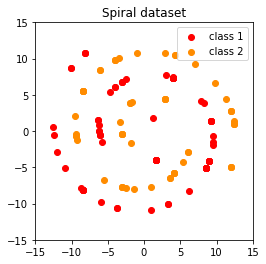

In [10]:
visualizer.plot_spiral_dataset(x_train, y_train)

In [16]:
xi = np.arange(-15, 15, 0.1)
xj = np.arange(-15, 15, 0.1)
x_sample = np.array([[j, i] for i in xi for j in xj])
out = M_model(torch.tensor(x_sample))
out.shape

torch.Size([90000, 2])

<ipython-input-18-d87c6c2fe80b>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, confidence)


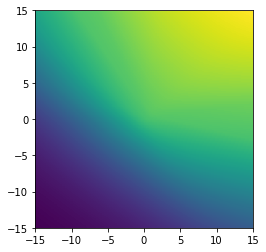

In [18]:
# get P(Y=1|X)
confidence = torch.transpose(torch.nn.functional.softmax(out, dim=1), 0, 1)[
    1].detach().numpy()
confidence = confidence.reshape((len(xi), len(xj)))
x, y = np.meshgrid(xi, xj)

plt.pcolormesh(x, y, confidence)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()


In [20]:
def get_dim(x, y, dim=0, label_class=0, subset=500):
    return x[y == label_class, dim][:subset]

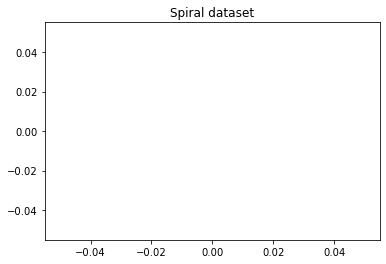

In [23]:
y_train_class = visualizer.one_hot_to_index_vector(y_train)
x_d0_l0 = get_dim(x_train, y_train_class, dim=0, label_class=0)
x_d1_l0 = get_dim(x_train, y_train_class, dim=1, label_class=0)
x_d0_l1 = get_dim(x_train, y_train_class, dim=0, label_class=1)
x_d1_l1 = get_dim(x_train, y_train_class, dim=1, label_class=1)

plt.title('Spiral dataset')
plt.plot(x_d0_l0, x_d1_l0, '.', label='class 0')
plt.plot(x_d0_l1, x_d1_l1, '.', label='class 1')


AttributeError: 'Spine' object has no attribute 'get_array'

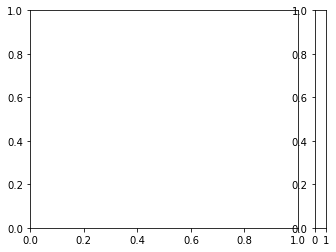

In [26]:
ax = plt.gca()
PCM = ax.get_children()[2]
plt.colorbar(PCM, ax=ax)
plt.show()
